Lab: Building Advanced Transformers
Estimated time needed: 30 minutes

In this lab, you will implement and experiment with advanced Transformer models using Keras.

Learning objectives:

By the end of this lab, you will:

Implement advanced Transformer models using Keras.

Apply Transformers to real-world sequential data tasks.

Build, train, and evaluate Transformer models.

Step-by-Step Instructions:
Step 1: Import necessary libraries
Before you start, you need to import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as tensorflow.keras.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.api.layers import Layer, Dense, LayerNormalization, Dropout
from keras.api.models import Sequential, Model

#  Setup the Environment to generate synthetic stock price data
np.random.seed(42)
data_length = 2000  # Adjust data length as needed
trend = np.linspace(100, 200, data_length)
noise = np.random.normal(0, 2, data_length)
synthetic_data = trend + noise

# Create a DataFrame and save as 'stock_price.csv'
data = pd.DataFrame(synthetic_data, columns=['Close'])
data.to_csv('stock_price.csv', index=False)
print("Synthetic stock_price.csv created and loaded.")

Synthetic stock_price.csv created and loaded.


In [2]:
# Load the dataset
data = pd.read_csv('stock_price.csv')
data = data[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Prepare the data for training
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X, Y = create_dataset(data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

print("Shape of X: ", X.shape)
print("Shape of Y: ", Y.shape)

# In the above code:
# tensorflow is the main library for machine learning in Python.
# stock_prices.csv is the data set that is loaded.
# MinMaxScaler method is used to normalize the data.
# create_datasetmethod is used to prepare the data for training.

Shape of X:  (1899, 100, 1)
Shape of Y:  (1899,)


In [ ]:
# Step 2: Implement Multi-Head Self-Attention
# Define the Multi-Head Self-Attention mechanism.
# define the class
class MultiHeadSelfAttention(Layer):
    # initialize the class
    # constructor
    def __init__(self, embed_dim, num_heads=8):
        # call the parent class constructor
        super(MultiHeadSelfAttention, self).__init__()
        # assign the parameters
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.projection_dim = embed_dim // num_heads
        self.query_dense = Dense(embed_dim)
        self.key_dense = Dense(embed_dim)
        self.value_dense = Dense(embed_dim)
        self.combine_heads = Dense(embed_dim)

    # define the attention mechanism
    def attention(self, query, key, value):
        # compute the score
        # """Multiplies matrix `a` by matrix `b`, producing `a` * `b`.

        #   The inputs must, following any transpositions, be tensors of rank >= 2
        #   where the inner 2 dimensions specify valid matrix multiplication dimensions,
        #   and any further outer dimensions specify matching batch size.

        #   Both matrices must be of the same type. The supported types are:
        #   `bfloat16`, `float16`, `float32`, `float64`, `int32`, `int64`,
        #   `complex64`, `complex128`.

        #   Either matrix can be transposed or adjointed (conjugated and transposed) on
        #   the fly by setting one of the corresponding flag to `True`. These are `False`
        #   by default.

        #   If one or both of the matrices contain a lot of zeros, a more efficient
        #   multiplication algorithm can be used by setting the corresponding
        #   `a_is_sparse` or `b_is_sparse` flag to `True`. These are `False` by default.
        #   This optimization is only available for plain matrices (rank-2 tensors) with
        #   datatypes `bfloat16` or `float32`.
        score = tf.matmul(query, key, transpose_b=True)
        # the funney thing is that I thought that TOP⬆️ developers won't use TODOs in their code cuz I think they may be more professional
        # LOL NO OFFENSE
        '''# pylint: disable=redefined-builtin
        # TODO(b/274626120) Update `tf_shape_default_int64` comment when it is better
        # supported.
        """Returns a tensor containing the shape of the input tensor.

        See also `tf.size`, `tf.rank`.

        `tf.shape` returns a 1-D integer tensor representing the shape of `input`.
        For a scalar input, the tensor returned has a shape of (0,) and its value is
        the empty vector (i.e. []).

        For example:

        >>> tf.shape(1.)
        <tf.Tensor: shape=(0,), dtype=int32, numpy=array([], dtype=int32)>

        >>> t = tf.constant([[[1, 1, 1], [2, 2, 2]], [[3, 3, 3], [4, 4, 4]]])
        >>> tf.shape(t)
        <tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 2, 3], dtype=int32)>

        Note: When using symbolic tensors, such as when using the Keras API,
        tf.shape() will return the shape of the symbolic tensor.

        >>> a = tf.keras.layers.Input((None, 10))
        >>> tf.shape(a)
        <... shape=(3,) dtype=int32...>

        In these cases, using `tf.Tensor.shape` will return more informative results.

        >>> a.shape
        TensorShape([None, None, 10])

        (The first `None` represents the as yet unknown batch size.)

        `tf.shape` and `Tensor.shape` should be identical in eager mode.  Within
        `tf.function` or within a `compat.v1` context, not all dimensions may be
        known until execution time. Hence, when defining custom layers and models
        for graph mode, prefer the dynamic `tf.shape(x)` over the static `x.shape`.

        Args:
            input: A `Tensor` or `SparseTensor`.
            out_type: (Optional) The specified output type of the operation (`int32` or
            `int64`). Defaults to `tf.int32`. (Note: there is an experimental
            flag, `tf_shape_default_int64` that changes the default to `tf.int64`.
            This is an unsupported, experimental setting that causes known breakages.)
            name: A name for the operation (optional).

        Returns:
            A `Tensor` of type `out_type`.'''
        '''  """Casts a tensor to a new type.
        '''
        # --------------------------------------------------------------------------
        '''
        The operation casts `x` (in case of `Tensor`) or `x.values`
        (in case of `SparseTensor` or `IndexedSlices`) to `dtype`.

        For example:

        >>> x = tf.constant([1.8, 2.2], dtype=tf.float32)
        >>> tf.cast(x, tf.int32)
        <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

        Notice `tf.cast` has an alias `tf.dtypes.cast`:

        >>> x = tf.constant([1.8, 2.2], dtype=tf.float32)
        >>> tf.dtypes.cast(x, tf.int32)
        <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

        The operation supports data types (for `x` and `dtype`) of
        `uint8`, `uint16`, `uint32`, `uint64`, `int8`, `int16`, `int32`, `int64`,
        `float16`, `float32`, `float64`, `complex64`, `complex128`, `bfloat16`.
        In case of casting from complex types (`complex64`, `complex128`) to real
        types, only the real part of `x` is returned. In case of casting from real
        types to complex types (`complex64`, `complex128`), the imaginary part of the
        returned value is set to `0`. The handling of complex types here matches the
        behavior of numpy.

        Note casting nan and inf values to integral types has undefined behavior.

        Note this operation can lead to a loss of precision when converting native
        Python `float` and `complex` variables to `tf.float64` or `tf.complex128`
        tensors, since the input is first converted to the `float32` data type and
        then widened. It is recommended to use `tf.convert_to_tensor` instead of
        `tf.cast` for any non-tensor inputs.
          Args:
        x: A `Tensor` or `SparseTensor` or `IndexedSlices` of numeric type. It could
        be `uint8`, `uint16`, `uint32`, `uint64`, `int8`, `int16`, `int32`,
        `int64`, `float16`, `float32`, `float64`, `complex64`, `complex128`,
        `bfloat16`.
        dtype: The destination type. The list of supported dtypes is the same as
        `x`.
        name: A name for the operation (optional).

        Returns:
            A `Tensor` or `SparseTensor` or `IndexedSlices` with same shape as `x` and
            same type as `dtype`.

        Raises:
            TypeError: If `x` cannot be cast to the `dtype`.
        '''
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights
    
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)
        attention, _ = self.attention(query, key, value)
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention, (batch_size, -1, self.embed_dim))
        output = self.combine_heads(concat_attention)
        return output

# In the above code:
# The MultiHeadSelfAttention layer implements the multi-head self-attention mechanism, 
#   which allows the model to focus on different parts of the input sequence simultaneously.
# The attention parameter computes the attention scores and weighted sum of the values.
# The split_heads parameter splits the input into multiple heads for parallel attention computation.
# The call method applies the self-attention mechanism and combines the heads.

Step 3: Implement Transformer block<br/>
Define the Transformer block.

In [4]:
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(embed_dim),
        ])

        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    # In the above code:
    # The TransformerBlock layer combines multi-head self-attention with a feed-forward neural network and normalization layers.
    # Dropout is used to prevent overfitting.
    # The call method applies the self-attention, followed by the feedforward network with residual connections and layer normalization.
    #
    # I think this is the main part of the transformer model

Step 4: Implement Encoder Layer<br/>
Define the Encoder layer.

In [5]:
class EncoderLayer(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(EncoderLayer, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)
    
    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
'''
In the above code:

The EncoderLayer is similar to the TransformerBlock but is a reusable layer in the Transformer architecture.

It consists of a MultiHeadSelfAttention mechanism followed by a feedforward neural network.

Both sub-layers have residual connections around them, and layer normalization is applied to the output of each sub-layer.

The call method applies the self-attention, followed by the feedforward network, with residual connections and layer normalization.
'''

'\nIn the above code:\n\nThe EncoderLayer is similar to the TransformerBlock but is a reusable layer in the Transformer architecture.\n\nIt consists of a MultiHeadSelfAttention mechanism followed by a feedforward neural network.\n\nBoth sub-layers have residual connections around them, and layer normalization is applied to the output of each sub-layer.\n\nThe call method applies the self-attention, followed by the feedforward network, with residual connections and layer normalization.\n'

Step 5: Implement Transformer encoder<br/>
Define the Transformer Encoder.

In [6]:
class TransformerEncoder(Layer): 
    def __init__(self, num_layers, embed_dim, num_heads, ff_dim, rate=0.1): 
        super(TransformerEncoder, self).__init__() 
        self.num_layers = num_layers 
        self.embed_dim = embed_dim 
        self.enc_layers = [TransformerBlock(embed_dim, num_heads, ff_dim, rate) for _ in range(num_layers)] 
        self.dropout = Dropout(rate) 

    def call(self, inputs, training=False): 
        x = inputs 
        for i in range(self.num_layers): 
            x = self.enc_layers[i](x, training=training) 
        return x 
    
embed_dim = 128 
num_heads = 8 
ff_dim = 512 
num_layers = 4 

transformer_encoder = TransformerEncoder(num_layers, embed_dim, num_heads, ff_dim) 
inputs = tf.random.uniform((1, 100, embed_dim)) 
outputs = transformer_encoder(inputs, training=False)  # Use keyword argument for 'training' 
print(outputs.shape)  # Should print (1, 100, 128) 

'''
In the above code:

The TransformerEncoder is composed of multiple TransformerBlock layers, implementing the encoding part of the Transformer architecture.
'''

2025-03-14 20:17:46.391641: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2025-03-14 20:17:46.391778: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 128.00 GB
2025-03-14 20:17:46.391788: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 48.00 GB
2025-03-14 20:17:46.392291: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-14 20:17:46.392316: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(1, 100, 128)


'\nIn the above code:\n\nThe TransformerEncoder is composed of multiple TransformerBlock layers, implementing the encoding part of the Transformer architecture.\n'

In [7]:
'''
Step 6: Build and Compile the Transformer model
Integrate the Transformer Encoder into a complete model for sequential data.
'''
embed_dim = 128 
num_heads = 8 
ff_dim = 512 
num_layers = 4 

# Define the Transformer Encoder 
transformer_encoder = TransformerEncoder(num_layers, embed_dim, num_heads, ff_dim) 

# Build the model 
input_shape = (X.shape[1], X.shape[2]) 
inputs = tf.keras.Input(shape=input_shape) 

# Project the inputs to the embed_dim 
x = tf.keras.layers.Dense(embed_dim)(inputs) 
encoder_outputs = transformer_encoder(x) 
flatten = tf.keras.layers.Flatten()(encoder_outputs) 
outputs = tf.keras.layers.Dense(1)(flatten) 
model = tf.keras.Model(inputs, outputs) 

# Compile the model 
model.compile(optimizer='adam', loss='mse') 

# Summary of the model 
model.summary() 
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse')
model.summary()
'''
In the above code:
The Transformer Encoder model defines the necessary parameters, flattens the output, and ends with a dense layer to produce the final output.
The model is then compiled with the Adam optimizer and mean squared error loss.
'''

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 100, 128)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_1           │ (None, 100, 128)       │       793,088 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │        12,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 806,145 (3.08 MB)

 Trainable params: 806,145 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 100, 128)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_1           │ (None, 100, 128)       │       793,088 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │        12,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 806,145 (3.08 MB)

 Trainable params: 806,145 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

'\nIn the above code:\nThe Transformer Encoder model defines the necessary parameters, flattens the output, and ends with a dense layer to produce the final output.\nThe model is then compiled with the Adam optimizer and mean squared error loss.\n'

In [8]:
# Train the model
model.fit(X, Y, epochs=20, batch_size=32)
'''
In the above code:

The model is trained on the normalized stock price data for 20 epochs with a batch size of 32.
'''

Epoch 1/20


2025-03-14 20:17:49.893832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - loss: 12.5749
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.2497
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.2362
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.2095
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.2449
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.1706
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.1779
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.1633
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.1579
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.1549
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.1525
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.1133
Epoch 13/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.1116
Epoch 14/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0967
Epoch 15/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0862
Epoch 16/20
6

'\nIn the above code:\n\nThe model is trained on the normalized stock price data for 20 epochs with a batch size of 32.\n'

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


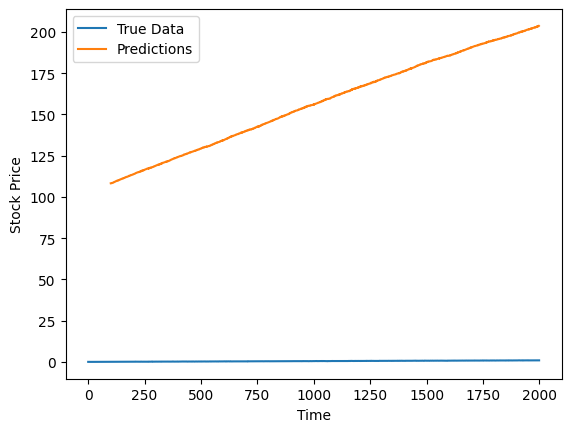

"\nIn the above code:\n\nThe model's predictions are transformed back to the original scale using the inverse transform of the scaler.\n\nThe true data and predictions are plotted to visualize the model's performance.\n"

In [9]:
# Make predictions
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

import matplotlib.pyplot as plt

plt.plot(data, label='True Data')
plt.plot(np.arange(time_step, time_step + len(predictions)), predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
'''
In the above code:

The model's predictions are transformed back to the original scale using the inverse transform of the scaler.

The true data and predictions are plotted to visualize the model's performance.
'''

So theoretically, I can compile my own transformer engine

Exercise 1: Add dropout to the Transformer model
Objective: Understand how to add dropout layers to the Transformer model to prevent overfitting.

Instructions:

Add a dropout layer after the Flatten layer in the model.

Set the dropout rate to 0.5.

In [10]:
from keras.api.layers import Dropout
import keras

# Add a dropout layer after the Flatten layer
flatten = keras.layers.Flatten()(encoder_outputs)
dropout = Dropout(0.5)(flatten)
outputs = keras.layers.Dense(1)(dropout)

# Build the model
model = keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, Y, epochs=20, batch_size=32)

# Evaluate the model
loss = model.evaluate(X, Y)
print(f'Test loss: {loss}')

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 5.8667
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 1.1551
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.4676
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.2486
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.1704
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.1332
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.1216
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.1113
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.1042
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0998
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0956
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0435
Epoch 13/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0264
Epoch 14/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0284
Epoch 15/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0290
Epo

Exercise 2: Experiment with different batch sizes
Objective: Observe the impact of different batch sizes on model performance.

Instructions:

Train the model with a batch size of 16.

Train the model with a batch size of 64.

Compare the training time and performance.

In [11]:
# Train the model with batch size 16
model.fit(X, Y, epochs=20, batch_size=16)

# Evaluate the model
loss = model.evaluate(X, Y)
print(f'Test loss with batch size 16: {loss}')

# Train the model with batch size 64
model.fit(X, Y, epochs=20, batch_size=64)

# Evaluate the model
loss = model.evaluate(X, Y)
print(f'Test loss with batch size 64: {loss}')

Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0155
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0319
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0288
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0308
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0250
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0339
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0250
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0170
Epoch 9/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0233
Epoch 10/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0269
Epoch 11/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0207
Epoch 12/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0188
Epoch 13/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0316
Epoch 14/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0197
Epoch 15/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s

Exercise 3: Use a different activation function
Objective: Understand how different activation functions impact the model performance.

Instructions:

Change the activation function of the Dense layer to tanh.

Train and evaluate the model.

In [12]:
# Change the activation function of the Dense layer to 'tanh'
outputs = keras.layers.Dense(1, activation='tanh')(dropout)

# Build the model
model = keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, Y, epochs=20, batch_size=32)

# Evaluate the model
loss = model.evaluate(X, Y)
print(f'Test loss with tanh activation: {loss}')

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - loss: 0.2937
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.2566
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.3418
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.2931
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.2886
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.2991
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.2956
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.2922
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.2991
Epoch 10/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.3043
Epoch 11/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.3015
Epoch 12/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.2909
Epoch 13/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.2997
Epoch 14/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.2988
Epoch 15/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.3006
Epo

# I think this is an important part of learning tensorflow which can help me understand tensorflow deeper.
# I will review this part later
# PS: I read <Attention is all you need> on the way to school this morning. I was a little bit confused. I should read it more times and figure it out clearly.
# https://research.google/pubs/attention-is-all-you-need/
# and some blog about running tensorflow on Apple Silicon's GPU
# https://twm.me/posts/how-to-run-tensorflow-gpu-mac/